In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [7]:
case1 = "nb"
case2 = "cc"
date = "0121"

In [8]:
# Set font settings for plots
plt.rcParams["font.family"] = "Times New Roman"  # Set font family
plt.rcParams["mathtext.fontset"] = "stix"  # Set LaTeX math font

# Define the reference origin (308.5mm)
origin = 0


# Function to read velocity data, including turbulence intensity, from CSV files
def read_velocity_data(folder, case):
    coordinates = []  # List to store coordinates
    u_mean_velocities = []  # List to store mean velocities
    u_turbulence_intensities = []  # List to store turbulence intensities
    folder_path = f"data/{folder}"

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith("_summary.csv"):
            # Extract the coordinate from the filename (e.g., data20.00_summary.csv -> 20.00mm)
            coordinate = float(
                filename.split(f"{folder}_vertical_0deg_{case}_17Hz_xc200")[1].split(
                    "_"
                )[0]
            )
            # Adjust the coordinate relative to the origin (308.5mm)
            relative_coordinate = coordinate - origin
            coordinates.append(relative_coordinate)

            # Read the CSV file
            file_path = os.path.join(folder_path, filename)
            with open(file_path, "r") as file:
                lines = file.readlines()

                # Look for the line containing U direction mean velocity and turbulence intensity
                for line in lines:
                    if line.startswith("U"):
                        # Split the line by commas, 2nd is mean velocity, 6th is turbulence intensity
                        data = line.split(",")
                        u_mean_velocity = float(data[1])
                        u_turbulence_intensity = float(
                            data[5]
                        )  # 6th element is turbulence intensity
                        u_mean_velocities.append(u_mean_velocity)
                        u_turbulence_intensities.append(u_turbulence_intensity)
                        break

    # Sort the data based on coordinates
    sorted_data = sorted(zip(coordinates, u_mean_velocities, u_turbulence_intensities))
    coordinates, u_mean_velocities, u_turbulence_intensities = zip(*sorted_data)

    return coordinates, u_mean_velocities, u_turbulence_intensities


# Function to save the plot as PNG and PDF
def save_plot(figure_name, save_dir="./", dpi=500):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    plt.savefig(
        os.path.join(save_dir, f"figure/{figure_name}.png"),
        format="png",
        dpi=dpi,
        bbox_inches="tight",
        pad_inches=0,
    )
    plt.savefig(
        os.path.join(save_dir, f"figure/{figure_name}.pdf"),
        format="pdf",
        dpi=dpi,
        bbox_inches="tight",
        pad_inches=0,
    )


In [50]:
case1 = "nb"
case2 = "ws"

# List of folders to compare (up to 10 folders)
# folders1 = [
#     # "20241222_01",
#     "20241222_04",
#     "20241222_06",
#     "20241222_07",
#     "20241222_09",
#     # "20241222_12",
# ]

# folders2 = [
#     # "20241222_02",
#     # "20241222_03",
#     "20241222_05",
#     "20241222_08",
#     "20241222_10",
#     "20241222_11",
# ]
folders1 = []
folders2 = []

folders1 = [
    # nb
    "20250128_01",
    "20250128_04",
    "20250128_06",
    "20250128_07",
]

folders2 = [
    # cc
    "20250128_02",
    "20250128_03",
    "20250128_05",
    "20250128_08",
]

# folders2 = [
#     # wb
#     "20241217_09",
#     "20241217_12",
#     "20241217_16",
#     "20241217_21",
# ]

# folders2 = [
#     # ws
#     "20250121_01",
#     "20250121_04",
#     "20250121_06",
#     "20250121_07",
# ]

# List of colors and markers for plotting (up to 10 combinations)
colors = [
    "k",
    "b",
    "r",
    "g",
    # "c",
    # "m",
]
markers = [
    "o",
    "s",
    "D",
    "^",
    # "v",
    # "P",
]

# Cycle through color and marker combinations
color_marker_combinations = itertools.cycle(zip(colors, markers))

C:\Users\3thou\AppData\Local\Temp\ipykernel_12020\1083093616.py:38: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 8
  plt.legend(handles=handles, labels=labels, fontsize=12)


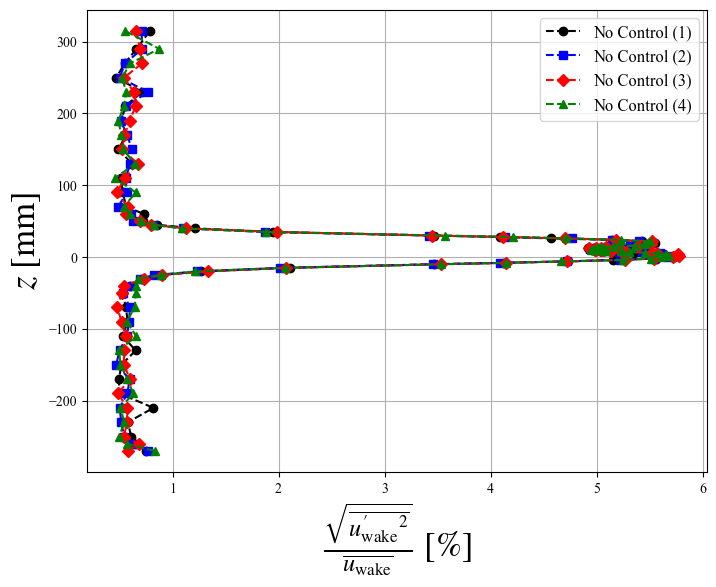

<Figure size 640x480 with 0 Axes>

In [51]:
# Plot turbulence intensity
plt.figure(figsize=(8, 6))

# Initialize lists for handles and labels
handles = []
labels = ["No Control (1)", "No Control (2)", "No Control (3)", "No Control (4)"]

# Loop through folders and plot turbulence intensity
for folder in folders1:
    coordinates, u_mean_velocities, u_turbulence_intensities = read_velocity_data(
        folder, case1
    )

    # Get color and marker for each folder
    color, marker = next(color_marker_combinations)

    # Plot turbulence intensity vs. coordinates
    (line,) = plt.plot(
        u_turbulence_intensities,
        coordinates,
        marker=marker,
        linestyle="--",
        color=color,
        label=f"{folder}",
    )
    handles.append(line)
    labels.append(folder)

# Set labels and title for turbulence intensity plot
plt.xlabel(
    r"$\frac{\sqrt{\overline{u_{\rm{wake}}'^2}}}{\overline{u_{\rm{wake}}}}~\rm{[\%]}$",
    fontsize=25,
)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)

# Enable grid and manually set legend
plt.grid(True)
plt.legend(handles=handles, labels=labels, fontsize=12)

# Save the plot
figure_name = folder if len(folders1) == 1 else f"{date}_{case1}_compare"
save_plot(f"{date}/TurbulenceIntensity_{figure_name}")

# Show the plot and clear
plt.show()
plt.clf()


20250128_02
20250128_03
20250128_05
20250128_08


C:\Users\3thou\AppData\Local\Temp\ipykernel_12020\474008954.py:44: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 8
  plt.legend(handles=handles, labels=labels, fontsize=12)


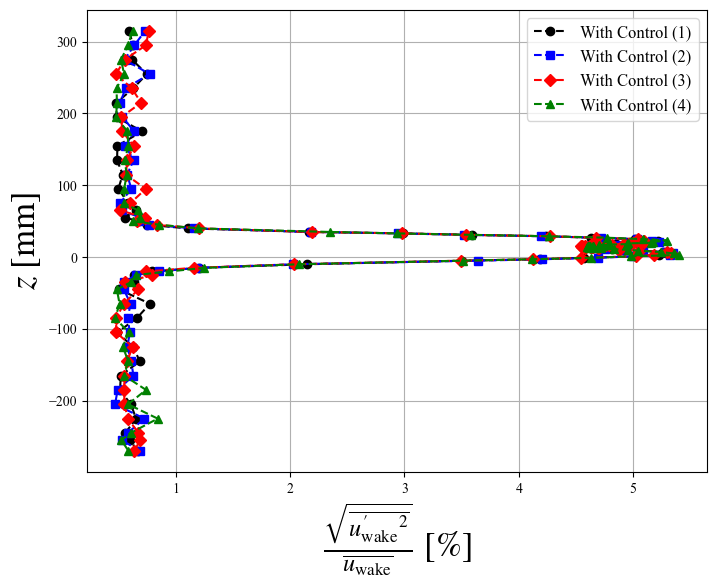

<Figure size 640x480 with 0 Axes>

In [53]:
# Plot turbulence intensity
plt.figure(figsize=(8, 6))

# Initialize lists for handles and labels
handles = []
labels = [
    "With Control (1)",
    "With Control (2)",
    "With Control (3)",
    "With Control (4)",
]

# Loop through folders and plot turbulence intensity
for folder in folders2:
    print(folder)
    coordinates, u_mean_velocities, u_turbulence_intensities = read_velocity_data(
        folder, case2
    )

    # Get color and marker for each folder
    color, marker = next(color_marker_combinations)

    # Plot turbulence intensity vs. coordinates
    (line,) = plt.plot(
        u_turbulence_intensities,
        coordinates,
        marker=marker,
        linestyle="--",
        color=color,
        label=f"{folder}",
    )
    handles.append(line)
    labels.append(folder)

# Set labels and title for turbulence intensity plot
plt.xlabel(
    r"$\frac{\sqrt{\overline{u_{\rm{wake}}'^2}}}{\overline{u_{\rm{wake}}}}~\rm{[\%]}$",
    fontsize=25,
)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)

# Enable grid and manually set legend
plt.grid(True)
plt.legend(handles=handles, labels=labels, fontsize=12)

# Save the plot
figure_name = folder if len(folders1) == 1 else f"{date}_{case2}_compare"
save_plot(f"{date}/TurbulenceIntensity_{figure_name}")

# Show the plot and clear
plt.show()
plt.clf()


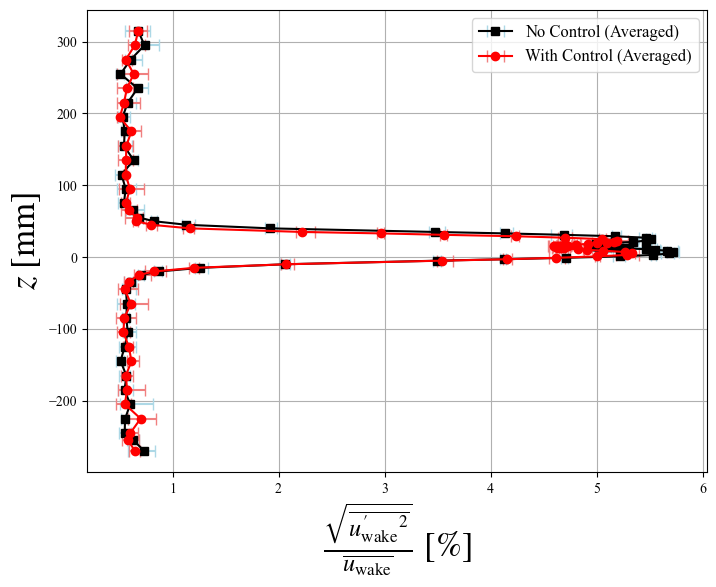

<Figure size 640x480 with 0 Axes>

In [54]:
# Plot turbulence intensity with error bars for both case1 (no control) and case2 (with control)
plt.figure(figsize=(8, 6))

# Initialize lists to store data for averaging
all_turbulence_intensities_case1 = []
all_turbulence_intensities_case2 = []

# Loop through folders and collect turbulence intensity data for case1
for folder in folders1:
    coordinates, _, u_turbulence_intensities = read_velocity_data(folder, case1)
    all_turbulence_intensities_case1.append(u_turbulence_intensities)

# Loop through folders and collect turbulence intensity data for case2
for folder in folders2:
    coordinates, _, u_turbulence_intensities = read_velocity_data(folder, case2)
    all_turbulence_intensities_case2.append(u_turbulence_intensities)

# Convert lists to arrays for easier averaging
all_turbulence_intensities_case1 = np.array(all_turbulence_intensities_case1)
all_turbulence_intensities_case2 = np.array(all_turbulence_intensities_case2)

# Compute the mean, max, and min turbulence intensity across folders for case1
mean_turbulence_intensities_case1 = np.mean(all_turbulence_intensities_case1, axis=0)
max_turbulence_intensities_case1 = np.max(all_turbulence_intensities_case1, axis=0)
min_turbulence_intensities_case1 = np.min(all_turbulence_intensities_case1, axis=0)

# Compute the mean, max, and min turbulence intensity across folders for case2
mean_turbulence_intensities_case2 = np.mean(all_turbulence_intensities_case2, axis=0)
max_turbulence_intensities_case2 = np.max(all_turbulence_intensities_case2, axis=0)
min_turbulence_intensities_case2 = np.min(all_turbulence_intensities_case2, axis=0)

# Calculate error bars (difference between mean and max/min) for case1
error_bars_case1 = np.array(
    [
        mean_turbulence_intensities_case1
        - min_turbulence_intensities_case1,  # Lower error
        max_turbulence_intensities_case1
        - mean_turbulence_intensities_case1,  # Upper error
    ]
)

# Calculate error bars (difference between mean and max/min) for case2
error_bars_case2 = np.array(
    [
        mean_turbulence_intensities_case2
        - min_turbulence_intensities_case2,  # Lower error
        max_turbulence_intensities_case2
        - mean_turbulence_intensities_case2,  # Upper error
    ]
)

# Plot the averaged turbulence intensity with error bars for case1
plt.errorbar(
    mean_turbulence_intensities_case1,
    coordinates,
    xerr=error_bars_case1,
    fmt="s",
    linestyle="-",
    color="k",
    ecolor="lightblue",
    elinewidth=1.5,
    capsize=4,
    label="No Control (Averaged)",
)

# Plot the averaged turbulence intensity with error bars for case2
plt.errorbar(
    mean_turbulence_intensities_case2,
    coordinates,
    xerr=error_bars_case2,
    fmt="o",
    linestyle="-",
    color="r",
    ecolor="lightcoral",
    elinewidth=1.5,
    capsize=4,
    label="With Control (Averaged)",
)

# Set labels and title for turbulence intensity plot
plt.xlabel(
    r"$\frac{\sqrt{\overline{u_{\rm{wake}}'^2}}}{\overline{u_{\rm{wake}}}}~\rm{[\%]}$",
    fontsize=25,
)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)

# Enable grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Save the plot
figure_name = f"{date}/TurbulenceIntensity_Comparison_{case1}_{case2}"
save_plot(figure_name)

# Show the plot and clear
plt.show()
plt.clf()

C:\Users\3thou\AppData\Local\Temp\ipykernel_12020\2381138776.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 8
  plt.legend(handles=handles, labels=labels, fontsize=12)


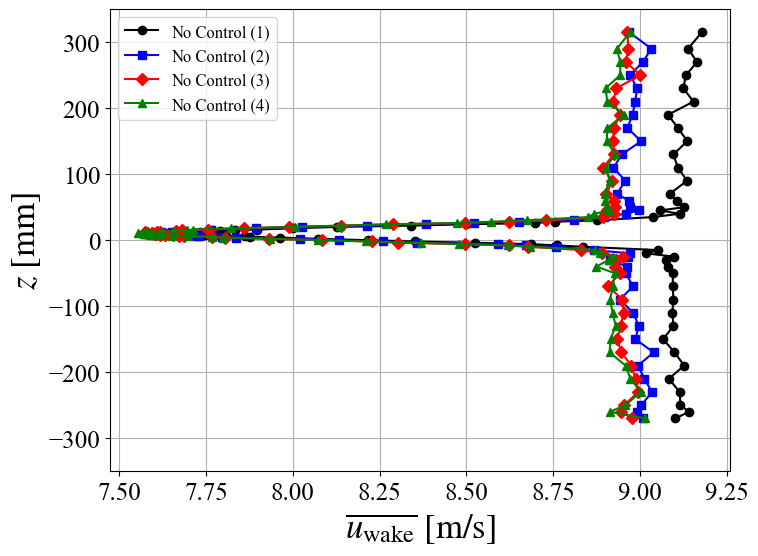

<Figure size 640x480 with 0 Axes>

In [55]:
# Plot mean velocity
plt.figure(figsize=(8, 6))

# Initialize lists for handles and labels
handles = []
labels = ["No Control (1)", "No Control (2)", "No Control (3)", "No Control (4)"]

# Loop through folders and plot mean velocity
for folder in folders1:
    coordinates, u_mean_velocities, u_turbulence_intensities = read_velocity_data(
        folder, case1
    )
    color, marker = next(color_marker_combinations)
    (line,) = plt.plot(
        u_mean_velocities,
        coordinates,
        marker=marker,
        linestyle="-",
        color=color,
        label=f"{folder}",
    )
    handles.append(line)
    labels.append(folder)

# Set labels and title for mean velocity plot
plt.xlabel(r"$\overline{u_{ \rm{wake}}}~\rm{[m/s]}$", fontsize=25)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)
plt.tick_params(labelsize=18)

# Enable grid and manually set legend
plt.grid(True)
plt.legend(handles=handles, labels=labels, fontsize=12)

# Set axis limits for mean velocity plot
plt.ylim([-350, 350])
# plt.xlim([7, 9])
# plt.xlim([16, 22])

# Save the plot
figure_name = folder if len(folders1) == 1 else f"{date}_{case1}_compare"
save_plot(f"{date}/MeanVelocity_{figure_name}")

# Show the plot and clear
plt.show()
plt.clf()


C:\Users\3thou\AppData\Local\Temp\ipykernel_12020\4124636975.py:37: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 8
  plt.legend(handles=handles, labels=labels, fontsize=12)


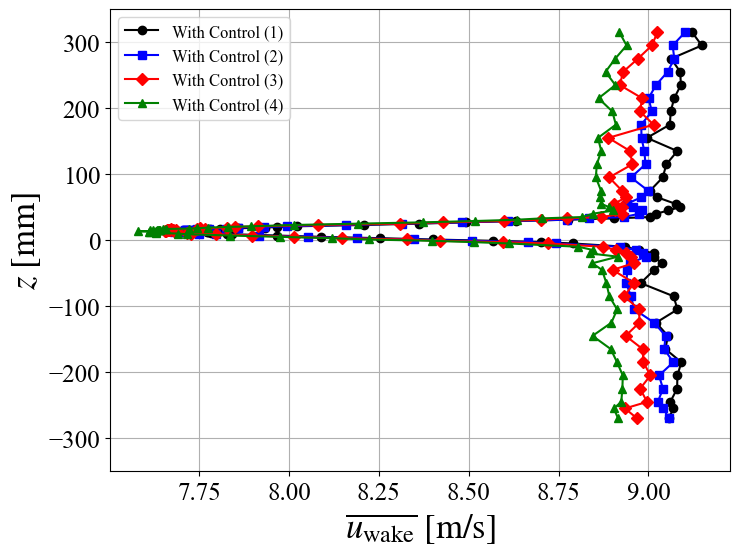

<Figure size 640x480 with 0 Axes>

In [56]:
# Plot mean velocity
plt.figure(figsize=(8, 6))

# Initialize lists for handles and labels
handles = []
labels = [
    "With Control (1)",
    "With Control (2)",
    "With Control (3)",
    "With Control (4)",
]

# Loop through folders and plot mean velocity
for folder in folders2:
    coordinates, u_mean_velocities, u_turbulence_intensities = read_velocity_data(
        folder, case2
    )
    color, marker = next(color_marker_combinations)
    (line,) = plt.plot(
        u_mean_velocities,
        coordinates,
        marker=marker,
        linestyle="-",
        color=color,
        label=f"{folder}",
    )
    handles.append(line)
    labels.append(folder)

# Set labels and title for mean velocity plot
plt.xlabel(r"$\overline{u_{ \rm{wake}}}~\rm{[m/s]}$", fontsize=25)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)
plt.tick_params(labelsize=18)

# Enable grid and manually set legend
plt.grid(True)
plt.legend(handles=handles, labels=labels, fontsize=12)

# Set axis limits for mean velocity plot
plt.ylim([-350, 350])
# plt.xlim([7, 9])
# plt.xlim([16, 22])

# Save the plot
figure_name = folder if len(folders2) == 1 else f"{date}_{case2}_compare"
save_plot(f"{date}/MeanVelocity_{figure_name}")

# Show the plot and clear
plt.show()
plt.clf()


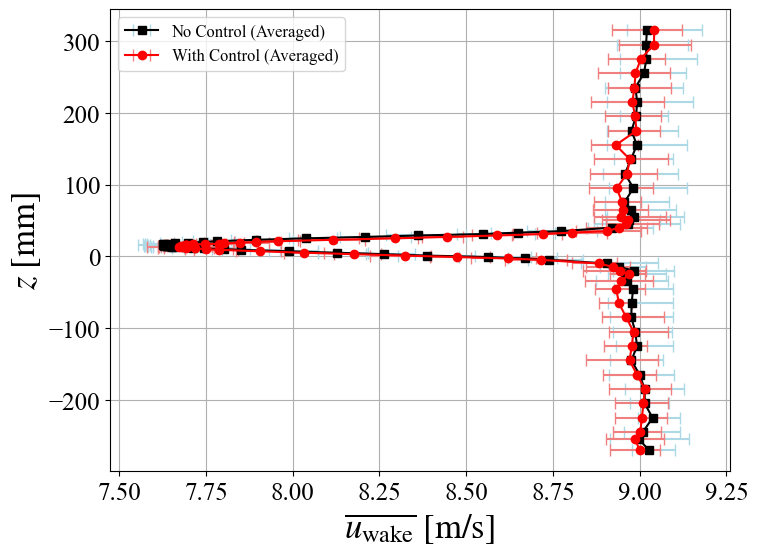

<Figure size 640x480 with 0 Axes>

In [59]:
# Plot mean velocity with error bars for both case1 (no control) and case2 (with control)
plt.figure(figsize=(8, 6))

# Initialize lists to store data for averaging
all_mean_velocities_case1 = []
all_mean_velocities_case2 = []

# Loop through folders and collect mean velocity data for case1
for folder in folders1:
    coordinates, u_mean_velocities, _ = read_velocity_data(folder, case1)
    all_mean_velocities_case1.append(u_mean_velocities)

# Loop through folders and collect mean velocity data for case2
for folder in folders2:
    coordinates, u_mean_velocities, _ = read_velocity_data(folder, case2)
    all_mean_velocities_case2.append(u_mean_velocities)

# Convert lists to arrays for easier averaging
all_mean_velocities_case1 = np.array(all_mean_velocities_case1)
all_mean_velocities_case2 = np.array(all_mean_velocities_case2)

# Compute the mean, max, and min mean velocities across folders for case1
mean_velocities_case1 = np.mean(all_mean_velocities_case1, axis=0)
max_velocities_case1 = np.max(all_mean_velocities_case1, axis=0)
min_velocities_case1 = np.min(all_mean_velocities_case1, axis=0)

# Compute the mean, max, and min mean velocities across folders for case2
mean_velocities_case2 = np.mean(all_mean_velocities_case2, axis=0)
max_velocities_case2 = np.max(all_mean_velocities_case2, axis=0)
min_velocities_case2 = np.min(all_mean_velocities_case2, axis=0)

# Calculate error bars (difference between mean and max/min) for case1
error_bars_case1 = np.array(
    [
        mean_velocities_case1 - min_velocities_case1,  # Lower error
        max_velocities_case1 - mean_velocities_case1,  # Upper error
    ]
)

# Calculate error bars (difference between mean and max/min) for case2
error_bars_case2 = np.array(
    [
        mean_velocities_case2 - min_velocities_case2,  # Lower error
        max_velocities_case2 - mean_velocities_case2,  # Upper error
    ]
)

# Plot the averaged mean velocity with error bars for case1
plt.errorbar(
    mean_velocities_case1,
    coordinates,
    xerr=error_bars_case1,
    fmt="s",
    linestyle="-",
    color="k",
    ecolor="lightblue",
    elinewidth=1.5,
    capsize=4,
    label="No Control (Averaged)",
)

# Plot the averaged mean velocity with error bars for case2
plt.errorbar(
    mean_velocities_case2,
    coordinates,
    xerr=error_bars_case2,
    fmt="o",
    linestyle="-",
    color="r",
    ecolor="lightcoral",
    elinewidth=1.5,
    capsize=4,
    label="With Control (Averaged)",
)

# Set labels and title for mean velocity plot
plt.xlabel(r"$\overline{u_{ \rm{wake}}}~\rm{[m/s]}$", fontsize=25)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)
plt.tick_params(labelsize=18)

# Enable grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Set axis limits for mean velocity plot
# plt.ylim([-30, 50])
# plt.xlim([7, 9])
# plt.xlim([16, 22])

# Save the plot
figure_name = f"{date}/MeanVelocity_Comparison_{case1}_{case2}"
save_plot(figure_name)

# Show the plot and clear
plt.show()
plt.clf()

In [161]:
import pandas as pd


# ピトー管データを読み込む関数を定義
def read_pitot_data(folder):
    coordinates = []
    mean_velocities = []
    folder_path = f"data/{folder}"

    # フォルダ内のすべてのピトー管データファイルを取得
    for filename in os.listdir(folder_path):
        if filename.endswith("_pitot.csv"):
            # ファイルから座標を取得（例: data20.00_pitot.csv -> 20.00mm）
            coordinate = float(
                filename.split(f"{folder}_vertical_0deg_nb_42Hz_xc200")[1].split("_")[0]
            )
            # 座標を308.5mmを基準に変更
            relative_coordinate = coordinate - origin
            coordinates.append(relative_coordinate)

            # CSVファイルを読み込み、10個の速度データを平均化
            file_path = os.path.join(folder_path, filename)
            data = pd.read_csv(file_path, header=None).values.flatten()
            mean_velocity = data.mean()  # 平均速度を計算
            mean_velocities.append(mean_velocity)

    # 座標と平均速度をソート
    sorted_data = sorted(zip(coordinates, mean_velocities))
    coordinates, mean_velocities = zip(*sorted_data)

    return coordinates, mean_velocities


# Initialize lists for handles and labels
handles = []
labels = ["No Control (1)", "No Control (2)", "No Control (3)", "No Control (4)"]

for folder in folders1:
    coordinates, mean_velocities = read_pitot_data(folder)
    color, marker = next(color_marker_combinations)
    (line,) = plt.plot(
        mean_velocities,
        coordinates,
        marker=marker,
        linestyle="-",
        color=color,
        label=f"{folder}",
    )
    handles.append(line)
    labels.append(folder)

# Set labels and title for pitot tube velocity plot
plt.xlabel(r"$\overline{u_{ \rm{pitot}}}~\rm{[m/s]}$", fontsize=25)
plt.ylabel(r"$z~\rm{(HW's~position)}~\rm{[mm]}$", fontsize=25)
plt.tick_params(labelsize=18)

# Enable grid and manually set legend
plt.grid(True)
plt.legend(handles=handles, labels=labels, fontsize=12)

# Set axis limits for pitot tube velocity plot
plt.ylim([-350, 350])
plt.xlim([7, 9])

# Save the plot
figure_name = folder if len(folders1) == 1 else f"{date}_{case1}_compare"
save_plot(f"{date}/pitot_Velocity_{figure_name}")

# Show the plot and clear
plt.show()
plt.clf()


TypeError: can only concatenate str (not "float") to str

C:\Users\Senri\AppData\Local\Temp\ipykernel_16492\30747494.py:64: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 8
  plt.legend(handles=handles, labels=labels, fontsize=12)


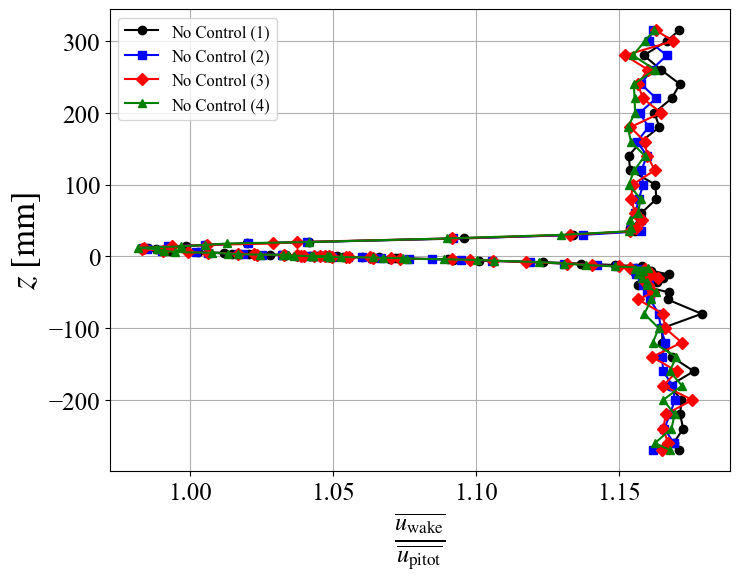

<Figure size 640x480 with 0 Axes>

In [ ]:
# ピトー管データを読み込む関数を定義
def read_pitot_data(folder):
    coordinates = []
    mean_velocities = []
    folder_path = f"data/{folder}"

    # フォルダ内のすべてのピトー管データファイルを取得
    for filename in os.listdir(folder_path):
        if filename.endswith("_pitot.csv"):
            # ファイルから座標を取得（例: data20.00_pitot.csv -> 20.00mm）
            coordinate = float(
                filename.split(f"{folder}_vertical_0deg_nb_42Hz_xc200")[1].split("_")[0]
            )
            # 座標を308.5mmを基準に変更
            relative_coordinate = coordinate - origin
            coordinates.append(relative_coordinate)

            # CSVファイルを読み込み、10個の速度データを平均化
            file_path = os.path.join(folder_path, filename)
            data = pd.read_csv(file_path, header=None).values.flatten()
            mean_velocity = data.mean()  # 平均速度を計算
            mean_velocities.append(mean_velocity)

    # 座標と平均速度をソート
    sorted_data = sorted(zip(coordinates, mean_velocities))
    coordinates, mean_velocities = zip(*sorted_data)

    return coordinates, mean_velocities


# 無次元化した速度のプロットを生成
plt.figure(figsize=(8, 6))

# Initialize lists for handles and labels
handles = []
labels = ["No Control (1)", "No Control (2)", "No Control (3)", "No Control (4)"]

for folder in folders1:
    coordinates, u_wake, _ = read_velocity_data(folder, case1)
    _, u_pitot = read_pitot_data(folder)

    # 無次元化
    nondim_velocities = [uw / up for uw, up in zip(u_wake, u_pitot)]

    color, marker = next(color_marker_combinations)
    (line,) = plt.plot(
        nondim_velocities,
        coordinates,
        marker=marker,
        linestyle="-",
        color=color,
        label=f"{folder}",
    )
    handles.append(line)
    labels.append(folder)

# プロットのラベルとタイトルを設定
plt.xlabel(r"$\frac{\overline{u_{\rm{wake}}}}{\overline{u_{\rm{pitot}}}}$", fontsize=25)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)
plt.tick_params(labelsize=18)

# グリッドと凡例を手動で設定
plt.grid(True)
plt.legend(handles=handles, labels=labels, fontsize=12)

# プロットを保存
figure_name = folder if len(folders1) == 1 else f"{date}_{case1}_compare"
save_plot(f"{date}/Nondimensional_wake_{figure_name}")

# プロットを表示してクリア
plt.show()
plt.clf()


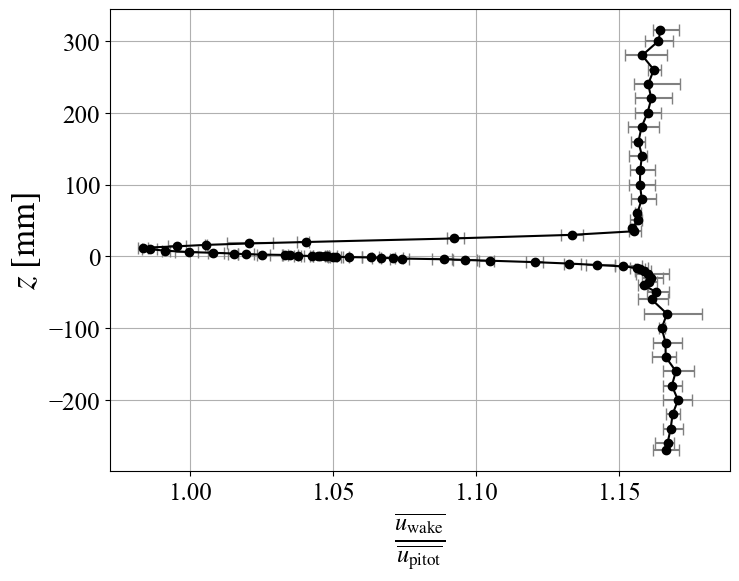

<Figure size 640x480 with 0 Axes>

In [100]:
# Plot nondimensional wake velocity with error bars
plt.figure(figsize=(8, 6))

# Initialize lists to store data for averaging
all_nondim_velocities = []

# Loop through folders and collect nondimensional wake velocity data
for folder in folders1:
    coordinates, u_wake, _ = read_velocity_data(folder, case1)
    _, u_pitot = read_pitot_data(folder)

    # Calculate nondimensional velocities
    nondim_velocities = [uw / up for uw, up in zip(u_wake, u_pitot)]
    all_nondim_velocities.append(nondim_velocities)

# Convert lists to arrays for easier averaging
all_nondim_velocities = np.array(all_nondim_velocities)

# Compute the mean, max, and min nondimensional velocities across folders
mean_nondim_velocities = np.mean(all_nondim_velocities, axis=0)
max_nondim_velocities = np.max(all_nondim_velocities, axis=0)
min_nondim_velocities = np.min(all_nondim_velocities, axis=0)

# Calculate error bars (difference between mean and max/min)
error_bars_nondim = np.array(
    [
        mean_nondim_velocities - min_nondim_velocities,  # Lower error
        max_nondim_velocities - mean_nondim_velocities,  # Upper error
    ]
)

# Plot the averaged nondimensional wake velocity with error bars
plt.errorbar(
    mean_nondim_velocities,
    coordinates,
    xerr=error_bars_nondim,
    fmt="o",
    linestyle="-",
    color="k",
    ecolor="gray",
    elinewidth=1.5,
    capsize=4,
    label="Mean Nondimensional Wake Velocity with Error Bars",
)

# Set labels and title for nondimensional wake velocity plot
plt.xlabel(r"$\frac{\overline{u_{\rm{wake}}}}{\overline{u_{\rm{pitot}}}}$", fontsize=25)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)
plt.tick_params(labelsize=18)

# Enable grid and legend
plt.grid(True)
# plt.legend(fontsize=12)

# Save the plot
figure_name = folder if len(folders1) == 1 else f"{date}_{case1}_compare"
save_plot(f"{date}/Nondimensional_wake_Averaged_WithErrorBars_{figure_name}")

# Show the plot and clear
plt.show()
plt.clf()